# Ease of Movement (EVM)

The Ease of Movement indicator involves several different calculations:

Distance Moved = ((High + Low) / 2 - (Prior High + Prior Low) / 2)

Box Ratio = (Volume / 100,000,000) / (High - Low)

1-Period EMV  = ((High + Low) / 2 - (Prior High + Prior Low) / 2) / ((Volume / 100,000,000 / (High - Low))

14-Period Ease of Movement = 14-period simple moving average of 1-period EMV

https://www.investopedia.com/terms/e/easeofmovement.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800


In [3]:
# Create a function for Ease of Movement
def EVM(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EVM = dm / br 
    EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name='EVM')
    data = data.join(EVM_MA) 
    return data

In [4]:
# Compute the 14-day Ease of Movement for stock
n = 14
Stock_EVM = EVM(df, n)
EVM = Stock_EVM['EVM']

<a list of 6 Text xticklabel objects>

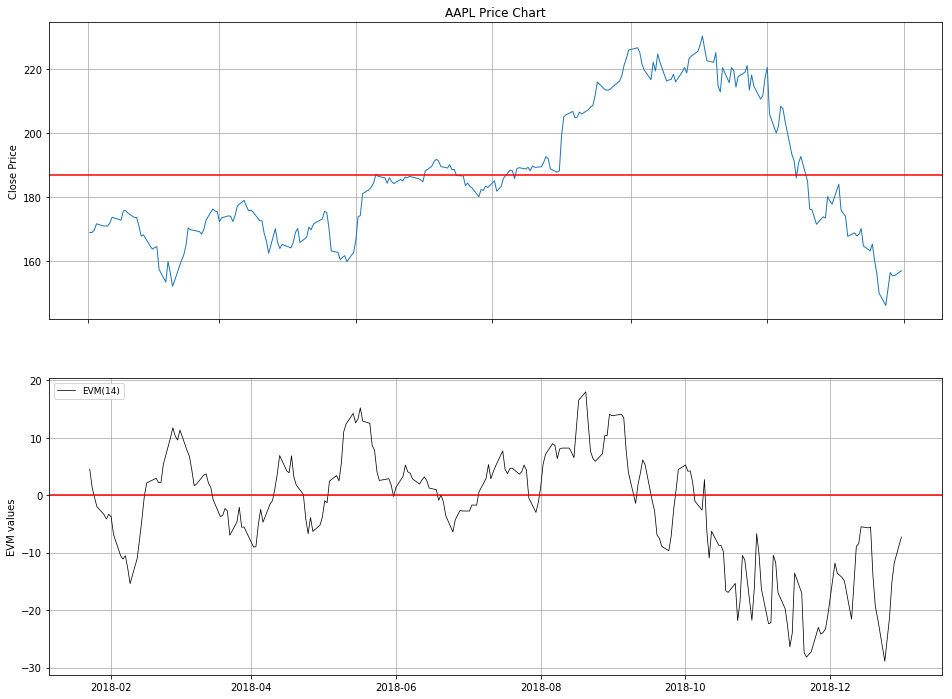

In [5]:
# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
ax.plot(df['Adj Close'],lw=1)
ax.axhline(y=df['Adj Close'].mean(),color='r')
ax.set_title(symbol + ' Price Chart')
ax.set_ylabel('Close Price')
ax.grid(True)

ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(EVM,'k',lw=0.75,linestyle='-',label='EVM(14)')
ax1.axhline(y=0,color='r')
ax1.legend(loc=2,prop={'size':9})
ax1.set_ylabel('EVM values')
ax1.grid(True)
ax1 = plt.gca()
ax1.get_xticklabels()

## Candlestick with EVM

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc = dfc.dropna()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,170.160004,172.300003,169.259995,172.259995,168.987320,25555900,False
1,736697.0,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,False
2,736698.0,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,False
3,736699.0,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,False
4,736702.0,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,False


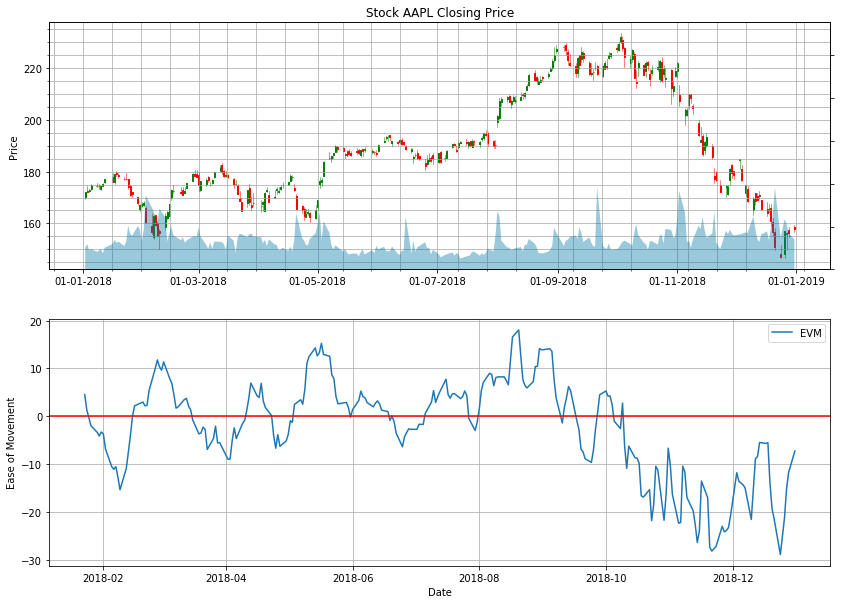

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
ax1v.fill_between(dfc.Date, 0, dfc.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(EVM, label='EVM')
ax2.axhline(y=0,color='r')
ax2.grid()
ax2.set_ylabel('Ease of Movement')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

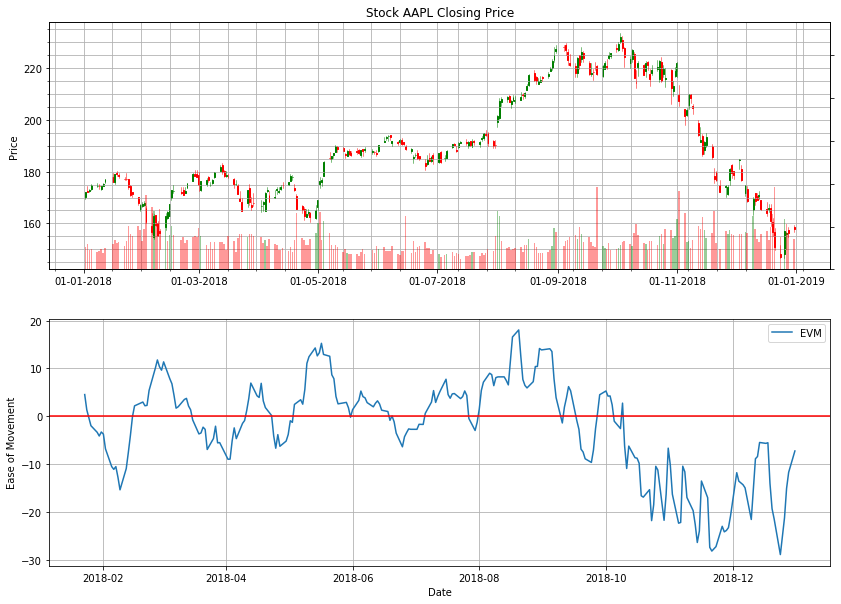

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(EVM, label='EVM')
ax2.axhline(y=0,color='r')
ax2.grid()
ax2.set_ylabel('Ease of Movement')
ax2.set_xlabel('Date')
ax2.legend(loc='best')